#### This file describes the functions used for the analysis of Heavy Neutral Leptons

For visualisation and interactive plots, `matplotlib` and `ipywidgets` must be installed.

Some of the functions need to specify the `hierarchy`: can be 'normal' ('n', 'nh', 'no') or 'inverse' ('i', 'ih', 'io'). 

The submodule contains the following:


Neutrinos:
- `NuFITNH`: dictionary with the NuFIT 2022 best-fit values for the neutrino oscillation parameters in the normal hierarchy (w/o Super-Kamiokande data)
- `NuFITIH`: same for the inverse hierarchy
- `PMNS(...)`: returns the PMNS matrix for a given set of parameters

Heavy Neutral Leptons:
- `HNL_decaywidths(M)` - returns the decay widths $\Gamma_\alpha$ for various decay channels of the HNL with mass `M`. 
- `HNL_branchings(M)` - returns a function that computes the branching ratios for the specified (xe, xmu)
- `HNL_branchings_specific(M)` - same as above, but for a specific set of final states used in the analysis
- `neutrino_priors(hierarchy)` - returns a function that computes the prior probability for the specified (xe, xmu) values in the assumption of a quasi-Dirac pair of HNLs, with $x_\alpha =U^2_\alpha/U^2$.
- `CasasIbarra_2(...)` - returns the matrix of $M_I \theta^2_{\alpha I}$ for two HNLs
- `CasasIbarra_3(...)` - same for three HNLs
- `mixing_ratios_2(...)` - returns the mixing ratios $x_\alpha$ for two HNLs.
- `model_scan(...)` - performs a scan for the specified real model of HNLs (xe, xmu) to find the required number of events `N_real` that excludes all the points consistent with the seesaw mechanism.


Import modules

In [21]:
from modeltesting import neutrinos as hnl
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colorbar import ColorbarBase
import ipywidgets as widgets

### Neutrinos

NuFIT best-fit values for the neutrino oscillation parameters. The angles are in radians, and the mass-squared differences are in eV^2.

In [9]:
print('Parameters:', list(hnl.NuFITIH.keys()))
print(hnl.NuFITIH)
print(hnl.NuFITNH)

Parameters: ['theta12', 'theta13', 'theta23', 'delta', 'dm2sol', 'dm2atm']
{'theta12': 0.5831145030913054, 'theta13': 0.14957471689591403, 'theta23': 0.8639379797371931, 'delta': 4.991641660703783, 'dm2sol': 7.41e-05, 'dm2atm': 0.002498}
{'theta12': 0.5831145030913054, 'theta13': 0.14905111812031574, 'theta23': 0.8569566627292158, 'delta': 3.4382986264288293, 'dm2sol': 7.41e-05, 'dm2atm': 0.002511}


PMNS matrix accepts the following parameters:
- `theta12`, `theta13`, `theta23`: the mixing angles
- `delta`: the Dirac CP phase
- `hierarchy`: the neutrino mass hierarchy ('normal' or 'inverted')
- `eta1`, `eta2`, `eta3`: the Majorana phases. If not specified, they are set to zero.

In [10]:
print(hnl.PMNS(hierarchy = 'n', 
               eta1 = 1, eta2 = 1, eta3 = 1,
               **hnl.NuFITNH))

[[ 0.44601761+0.69463127j  0.29420613+0.4581989j  -0.1132632 -0.09603983j]
 [-0.16942768-0.21316663j  0.31202882+0.51940017j  0.40386133+0.62897675j]
 [ 0.24683822+0.42834662j -0.32641287-0.47938776j  0.34983566+0.54483675j]]


### Heavy Neutral Leptons

`HNL_decaywidths(M)` returns a dictionary 

```{decay channel:(decay width in GeV, what lepton flavor can mediate the decay)}```.

where the decay widths $\Gamma_\alpha$ are normalized to $U_\alpha^2 = 1$.

**Note** that the dictionary contains the widths for both exclusive and inclusive decays. Below $M = 2$ GeV, decays into mesons should be used, and above $M = 2$ GeV, decays into quarks.



In [11]:
hnl.HNL_decaywidths(1.5)

{'3nu': (1.7807394613853195e-13, 'emt'),
 'nuee(e)': (1.0470748032945678e-13, 'e'),
 'nuee(NC)': (2.2437317213455027e-14, 'mt'),
 'nuemu': (1.7148521013140625e-13, 'em'),
 'numumu(mu)': (9.794067037619258e-14, 'm'),
 'numumu(NC)': (2.0300429859792644e-14, 'et'),
 'nuetau': (0.0, 'et'),
 'numutau': (0.0, 'mt'),
 'nutautau(tau)': (0.0, 't'),
 'nutautau(NC)': (0.0, 'em'),
 'nupi': (7.674987078570727e-14, 'emt'),
 'epi': (1.4548641399518057e-13, 'e'),
 'mupi': (1.4334952664151823e-13, 'm'),
 'nupipi': (5.395640567997518e-14, 'emt'),
 'epipi': (3.543671528156786e-13, 'e'),
 'mupipi': (3.492030083776612e-13, 'm'),
 'eK': (8.903697306926598e-15, 'e'),
 'muK': (8.725623360788066e-15, 'm'),
 'nueta': (2.3149612998009156e-14, 'emt'),
 'nuetaprime': (1.4780137529498152e-14, 'emt'),
 'nuomega': (1.3711693852666959e-14, 'emt'),
 'nuphi': (6.606543401739536e-14, 'emt'),
 'nuqq': (3.2409458197212817e-13, 'emt'),
 'eqq': (6.448057589676242e-13, 'e'),
 'muqq': (6.205877022927838e-13, 'm'),
 'tauqq': (0

`HNL_branchings(M)` and `HNL_branchings_specific(M)` return a function that computes the branching ratios for the specified `(xe, xmu)` values. The difference is that `HNL_branchings_specific` returns the results for the visible final states

In [12]:
branching_function = hnl.HNL_branchings(1.5)
xe, xmu = 0.05, 0.5
branching_function(xe, xmu)

{'3nu': 0.20177155424628238,
 'nuemu': 0.10686830370654346,
 'nuetau': 0.0,
 'numutau': 0.0,
 'nupi': 0.0869635398801477,
 'epi': 0.008242367990960633,
 'mupi': 0.08121305058412866,
 'nupipi': 0.06113678093662356,
 'epipi': 0.020076269647505095,
 'mupipi': 0.19783700893847989,
 'eK': 0.000504428885615706,
 'muK': 0.004943403079033918,
 'nueta': 0.02623030205201671,
 'nuetaprime': 0.016747039002441438,
 'nuomega': 0.015536409676963741,
 'nuphi': 0.07485724662537076,
 'nuqq': 0.36722422872823396,
 'eqq': 0.036530739896289424,
 'muqq': 0.351586933274147,
 'tauqq': 0.0,
 'nuee': 0.030084138738120703,
 'numumu': 0.06698815600976575,
 'nutautau': 0.0}

In [13]:
branching_function = hnl.HNL_branchings_specific(1.5)
xe, xmu = 0.05, 0.5
branching_function(xe, xmu)

{'ee': 0.030084138738120703,
 'emu': 0.10686830370654346,
 'mumu': 0.06698815600976575,
 'NC': 0.2814713181735639,
 'eCC': 0.028823066524081436,
 'muCC': 0.28399346260164243}

`CasasIbarra_2` returns the matrix $M_I \theta^2_{\alpha I}$ for two HNLs. It requires the parameters:
- `hierarchy`: the neutrino mass hierarchy
- `eta`: single Majorana phase of the active neutrinos
- `reomega` and `imomega`: the real and imaginary parts of the complex parameter $\omega$. For large values of `abs(omega)`, the quasi-Dirac limit is recovered and `reomega` drops out.

The function automatically uses the best-fit values of neutrino oscillation parameters the specified hierarchy, but these can be overwritten.

`mixing_ratios_2` returns the mixing ratios for the two HNLs. If `reomega` or `imomega` are not specified, the quasi-Dirac limit with `imomega` $\to +\infty$ is assumed.

In [14]:
print(r'\sqrt{M_I} \theta_{\alpha I} matrix:')
print(hnl.CasasIbarra_2(
    eta = 1, reomega = 1, imomega = 1, 
    hierarchy = 'n'
                  ))
print('\nMixing ratios:')
print(hnl.mixing_ratios_2(
    eta = 1, reomega = 1, imomega = 1, 
    hierarchy = 'n'
))

\sqrt{M_I} \theta_{\alpha I} matrix:
[[-0.01241879-0.00361884j  0.01255141+0.00192498j]
 [-0.01251092-0.02807925j -0.01441219+0.02528904j]
 [-0.05701256-0.05167682j  0.03675828+0.04898285j]]

Mixing ratios:
[0.11460398 0.26757183 0.61782419]


Visualisation of the mixing ratios for the two HNLs

In [19]:

def visualize_ratios(reomega, imomega, hierarchy = 'n'):
    etas = np.linspace(0, 2*np.pi, 100)

    def _(eta):
        u = hnl.CasasIbarra_2(
            eta = eta, reomega = reomega, imomega = imomega, 
            hierarchy = hierarchy
        )
        u1, u2 = u[:, 0], u[:, 1]
        u1 = np.abs(u1)
        u2 = np.abs(u2)
        x1, x2 = u1/np.sum(u1), u2/np.sum(u2)
        x = hnl.mixing_ratios_2(
            eta = eta, reomega = reomega, imomega = imomega, 
            hierarchy = hierarchy)
        return x1, x2, x
        
    mr1, mr2, mr = np.zeros((len(etas),3)), np.zeros((len(etas),3)), np.zeros((len(etas),3))
    for i, eta in enumerate(etas):
        mr1[i, :], mr2[i, :], mr[i, :] = _(eta)

    fig, ax = plt.subplots(figsize = (10, 10))

    ax.plot(mr[:,0], mr[:,1], label = 'Total mixing ratios')
    ax.plot(mr1[:,0], mr1[:,1], label = 'Mixing ratios of $N_1$')
    ax.plot(mr2[:,0], mr2[:,1], label = 'Mixing ratios of $N_2$')
    ax.set_xlabel('$x_e$')
    ax.set_ylabel('$x_\mu$')
    ax.set_xlim(0, 1) 
    ax.set_ylim(0, 1)
    ax.legend()
    ax.fill_between([0, 1], [1, 0], [1, 1], color = 'grey', alpha = 0.2)


    eta_points = [0, np.pi/2, np.pi, 3*np.pi/2]
    color_points = ['red', 'green', 'blue', 'black']
    
    for i, eta in enumerate(eta_points):
        x1, x2, x = _(eta)
        ax.scatter(x1[0], x1[1], color = color_points[i], marker = '.', s = 150)
        ax.scatter(x2[0], x2[1], color = color_points[i], marker = '.', s = 150)
        ax.scatter(x[0], x[1], color = color_points[i], marker = '.', s = 150)
    
    cbar_ax = fig.add_axes([0.9, 0.35, 0.02, 0.3]) 
    cmap = mcolors.ListedColormap(color_points)
    cbar = ColorbarBase(cbar_ax, 
                    cmap=cmap,
                    values=eta_points,
                    ticks=eta_points, 
                    orientation='vertical')
    cbar.set_ticklabels(['0', '$\pi/2$', '$\pi$', '$3\pi/2$'])


    plt.show()


widgets.interact(visualize_ratios,
                    reomega = widgets.FloatSlider(min = 0, max = 2*np.pi, step = 0.01, value = np.pi),
                    imomega = widgets.FloatSlider(min = -3, max = 3, step = 0.01, value = 0.5),
                    hierarchy = widgets.RadioButtons(options=['n', 'i'], value='i', description='Hierarchy:', disabled=False)
                    )



interactive(children=(FloatSlider(value=3.141592653589793, description='reomega', max=6.283185307179586, step=…

<function __main__.visualize_ratios(reomega, imomega, hierarchy='n')>

`Casas_Ibarra3` matrix does the same but for three HNLs. It requires the parameters:
- `hierarchy`: the neutrino mass hierarchy
- `eta1`, `eta2` - two Majorana phases of the active neutrinos
- `mnu0` - the lightest neutrino mass
- `reomega1`, `imomega1`, `reomega2`, `imomega2`, `reomega3`, `imomega3` - the real and imaginary parts of the complex parameters $\omega_{1,2,3}$.

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colorbar import ColorbarBase
import ipywidgets as widgets

def visualize_ratios3(mnu0, eta2, reomega1, imomega1, reomega2, imomega2, reomega3, imomega3, hierarchy = 'n'):
    etas = np.linspace(0, 2*np.pi, 100)

    def _(eta):
        u = hnl.CasasIbarra_3(eta1 = eta,
            eta2 = eta2, mnu0 = mnu0,
            reomega1 = reomega1, imomega1 = imomega1, 
            reomega2 = reomega2, imomega2 = imomega2, 
            reomega3 = reomega3, imomega3 = imomega3, 
            hierarchy = hierarchy
        )
        u1, u2, u3 = u[:, 0], u[:, 1], u[:, 2]
        u1 = np.abs(u1)
        u2 = np.abs(u2)
        u3 = np.abs(u3)
        x1, x2, x3 = u1/np.sum(u1), u2/np.sum(u2), u3/np.sum(u3)
        return x1, x2, x3, (u1+u2+u3)/np.sum(u1+u2+u3)
        
    mr1, mr2, mr3, mr = np.zeros((len(etas),3)), np.zeros((len(etas),3)), np.zeros((len(etas),3)), np.zeros((len(etas),3))
    for i, eta in enumerate(etas):
        mr1[i, :], mr2[i, :], mr3[i,:], mr[i, :] = _(eta)

    fig, ax = plt.subplots(figsize = (10, 10))

    ax.plot(mr[:,0], mr[:,1], label = 'Total mixing ratios')
    ax.plot(mr1[:,0], mr1[:,1], label = 'Mixing ratios of $N_1$')
    ax.plot(mr2[:,0], mr2[:,1], label = 'Mixing ratios of $N_2$')
    ax.plot(mr3[:,0], mr3[:,1], label = 'Mixing ratios of $N_3$')
    ax.set_xlabel('$x_e$')
    ax.set_ylabel('$x_\mu$')
    ax.set_xlim(0, 1) 
    ax.set_ylim(0, 1)
    ax.legend()
    ax.fill_between([0, 1], [1, 0], [1, 1], color = 'grey', alpha = 0.2)


    eta_points = [0, np.pi/2, np.pi, 3*np.pi/2]
    color_points = ['red', 'green', 'blue', 'black']
    
    for i, eta in enumerate(eta_points):
        x1, x2, x3, x = _(eta)
        ax.scatter(x1[0], x1[1], color = color_points[i], marker = '.', s = 150)
        ax.scatter(x2[0], x2[1], color = color_points[i], marker = '.', s = 150)
        ax.scatter(x3[0], x3[1], color = color_points[i], marker = '.', s = 150)
        ax.scatter(x[0], x[1], color = color_points[i], marker = '.', s = 150)
    
    cbar_ax = fig.add_axes([0.9, 0.35, 0.02, 0.3]) 
    cmap = mcolors.ListedColormap(color_points)
    cbar = ColorbarBase(cbar_ax, 
                    cmap=cmap,
                    values=eta_points,
                    ticks=eta_points, 
                    orientation='vertical')
    cbar.set_ticklabels(['0', '$\pi/2$', '$\pi$', '$3\pi/2$'])


    plt.show()


widgets.interact(visualize_ratios3,
                    mnu0 = widgets.FloatSlider(min = 0, max = 0.1, step = 0.01, value = 0.02, description = r'mnu0, eV'),
                    eta2 = widgets.FloatSlider(min = 0, max = 2*np.pi, step = 0.01, value = np.pi),
                    reomega1 = widgets.FloatSlider(min = 0, max = 2*np.pi, step = 0.01, value = np.pi),
                    imomega1 = widgets.FloatSlider(min = -5, max = 5, step = 0.01, value = 0.5),
                    reomega2 = widgets.FloatSlider(min = 0, max = 2*np.pi, step = 0.01, value = np.pi),
                    imomega2 = widgets.FloatSlider(min = -5, max = 5, step = 0.01, value = 0.5),
                    reomega3 = widgets.FloatSlider(min = 0, max = 2*np.pi, step = 0.01, value = np.pi),
                    imomega3 = widgets.FloatSlider(min = -5, max = 5, step = 0.01, value = 0.5),
                    hierarchy = widgets.RadioButtons(options=['n', 'i'], value='i', description='Hierarchy:', disabled=False)
                    )



interactive(children=(FloatSlider(value=0.02, description='mnu0, eV', max=0.1, step=0.01), FloatSlider(value=3…

<function __main__.visualize_ratios3(mnu0, eta2, reomega1, imomega1, reomega2, imomega2, reomega3, imomega3, hierarchy='n')>

`neutrino_priors(hierarchy)` returns a function that computes the prior probability for the specified `(xe, xmu)` values for two HNLs.

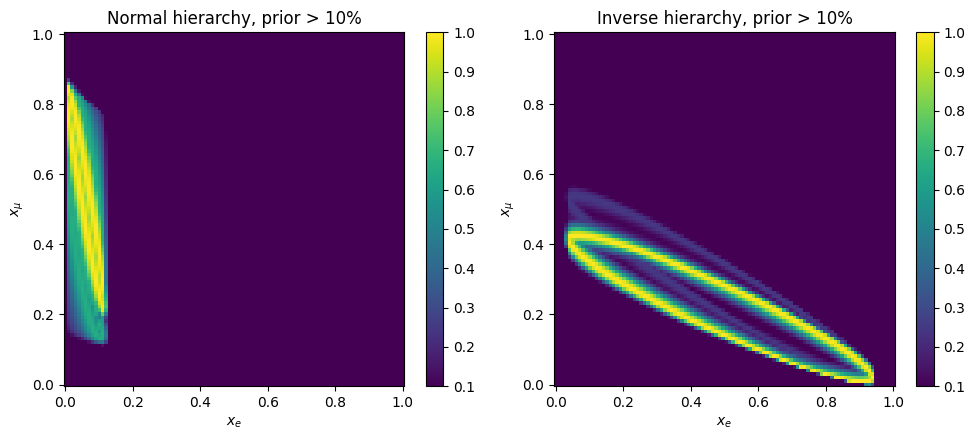

In [22]:
normal_prior = hnl.neutrino_priors('normal')
inverted_prior = hnl.neutrino_priors('inverse')

xe_grid = np.linspace(0, 1, 100)
xmu_grid = np.linspace(0, 1, 100)

fig, ax = plt.subplots(1, 2, figsize = (10, 4.5))
ax[0].pcolormesh(xe_grid, xmu_grid, normal_prior(xe_grid, xmu_grid, grid = True).T, vmin = 0.1, vmax = 1)
ax[1].pcolormesh(xe_grid, xmu_grid, inverted_prior(xe_grid, xmu_grid, grid = True).T,
                 norm = mcolors.Normalize(vmin = 0.1, vmax = 1))
ax[0].set_title('Normal hierarchy, prior > 10%')
ax[1].set_title('Inverse hierarchy, prior > 10%')
fig.colorbar(ax[1].collections[0], ax = ax[1])
fig.colorbar(ax[0].collections[0], ax = ax[0])
ax[0].set_xlabel('$x_e$')
ax[0].set_ylabel('$x_\mu$')
ax[1].set_xlabel('$x_e$')
ax[1].set_ylabel('$x_\mu$')

fig.tight_layout()

plt.show()

`model_scan`: computes `N_real` for a model with the specified `(xe, xmu)` to exclude all the points consistent with the seesaw mechanism. Returns a dictionary with various data. The parameters are:
- `branching_function`: function `branching_function(xe,xmu)` that returns an array of branchings
- `reference_point`: array `[xe, xmu]` for the reference point
- `backgrounds = None`: array of backgrounds for the visible final states. If not specified, the backgrounds are set to zero.
- `prior`: function `prior(xe, xmu)` that returns the prior probability
- `Nsamples = 10000`: number of samples to generate
- `estimate_only = True`: quick scan using the starting rough estimate of the number of events
- `exclusion_probability = 0.9`: the desired exclusion probability
- `exclusion_limit = 0.9`: CL limit to use for the exclusion
- `logs = False`: print logs

In [27]:
HNL_mass = 1.5
branching_function = hnl.HNL_branchings_specific(HNL_mass)
prior = hnl.neutrino_priors('normal')
reference_point = np.array([0.33, 0.33])


hnl.model_scan(
    branching_function=branching_function,
    prior=prior,
    reference_point=reference_point,
    estimate_only=True,
    logs = True
)

Finished estimates
Critical point data: {'Nreal': 75.09975732842479, 'tested_point': (0.12, 0.225), 'Ntested': 81.08190881958753, 'estimate': True, 'experimental_CL': 0.8904083855086047, 'neutrino_prior': 0.9124785729646453}

The required number of events to exclude [0.33 0.33] = 75.09975732842479
The best-fit model is (0.12, 0.225) with Nr = 75.09975732842479 and Nf = 81.08190881958753
The required experimental CL = 0.8904083855086047, prior = 0.9124785729646453



{'Nreal': 75.09975732842479,
 'tested_point': (0.12, 0.225),
 'Ntested': 81.08190881958753,
 'estimate': True,
 'experimental_CL': 0.8904083855086047,
 'neutrino_prior': 0.9124785729646453}

Proper computation, not using the rough estimate

In [26]:
import time

start = time.perf_counter()
print(hnl.model_scan(
    branching_function=branching_function,
    prior=prior,
    reference_point=reference_point,
    estimate_only=False,
    Nsamples = 10000,
    logs = True
))
end = time.perf_counter()
print(f'Time elapsed = {(end-start):.2f} s')

Finished estimates
Critical point data: {'Nreal': 75.09975732842479, 'tested_point': (0.12, 0.225), 'Ntested': 81.08190881958753, 'estimate': True, 'experimental_CL': 0.8904083855086047, 'neutrino_prior': 0.9124785729646453}

The required number of events to exclude [0.33 0.33] = 137.46207572307503
The best-fit model is (0.12, 0.23) with Nr = 137.46207572307503 and Nf = 155.489184726986
The required experimental CL = 0.8893165255995001, prior = 0.9034772403164488

Time elapsed = 29.83 s
